<a href="https://colab.research.google.com/github/shreshtha77/CVIP-Data-Science/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Terrorism


Project while working as Data science intern at CodersCave

(Normal Task)

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
data = pd.read_csv("/content/globalterrorism.csv", encoding='ISO-8859-1')
print(data)

             eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            5

## Pre-processing the data

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [8]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Dealing with null values

In [9]:
data.isnull().any()

eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

In [10]:
data = data[['eventid', 'iyear', 'imonth', 'country', 'region','provstate','city','crit1', 'crit2', 'crit3','success', 'suicide', 'attacktype1','targtype1','natlty1','gname','guncertain1','claimed','weaptype1','nkill','nwound']]

In [11]:
data.head()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,...,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
0,197000000001,1970,7,58,2,NaN,Santo Domingo,1,1,1,...,0,1,14,58.0,MANO-D,0.0,NaN,13,1.0,0.0
1,197000000002,1970,0,130,1,Federal,Mexico city,1,1,1,...,0,6,7,21.0,23rd of September Communist League,0.0,NaN,13,0.0,0.0
2,197001000001,1970,1,160,5,Tarlac,Unknown,1,1,1,...,0,1,10,217.0,Unknown,0.0,NaN,13,1.0,0.0
3,197001000002,1970,1,78,8,Attica,Athens,1,1,1,...,0,3,7,217.0,Unknown,0.0,NaN,6,NaN,NaN
4,197001000003,1970,1,101,4,Fukouka,Fukouka,1,1,1,...,0,7,7,217.0,Unknown,0.0,NaN,8,NaN,NaN


In [12]:
data.isnull().any()

eventid        False
iyear          False
imonth         False
country        False
region         False
provstate       True
city            True
crit1          False
crit2          False
crit3          False
success        False
suicide        False
attacktype1    False
targtype1      False
natlty1         True
gname          False
guncertain1     True
claimed         True
weaptype1      False
nkill           True
nwound          True
dtype: bool

In [13]:
data = data.dropna()

In [14]:
data.isnull().any()

eventid        False
iyear          False
imonth         False
country        False
region         False
provstate      False
city           False
crit1          False
crit2          False
crit3          False
success        False
suicide        False
attacktype1    False
targtype1      False
natlty1        False
gname          False
guncertain1    False
claimed        False
weaptype1      False
nkill          False
nwound         False
dtype: bool

In [15]:
data.isnull().sum()

eventid        0
iyear          0
imonth         0
country        0
region         0
provstate      0
city           0
crit1          0
crit2          0
crit3          0
success        0
suicide        0
attacktype1    0
targtype1      0
natlty1        0
gname          0
guncertain1    0
claimed        0
weaptype1      0
nkill          0
nwound         0
dtype: int64

In [16]:
data.describe()

,eventid,iyear,imonth,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,guncertain1,claimed,weaptype1,nkill,nwound
count,1.050730e+05,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000,105073.000000
mean,2.011576e+11,2011.509750,6.469712,124.716292,7.863542,0.988951,0.995746,0.886184,0.870471,0.056218,3.272401,8.624109,126.954403,0.106811,0.057598,6.308452,2.145699,3.802804
std,5.959570e+08,5.959394,3.383224,96.699951,2.460104,0.104535,0.065086,0.317589,0.335786,0.230343,1.804304,6.522664,93.529263,0.308875,1.052135,1.914574,9.820571,40.633761
min,1.970010e+11,1970.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000
25%,2.010011e+11,2010.000000,4.000000,92.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,92.000000,0.000000,0.000000,5.000000,0.000000,0.000000
50%,2.013102e+11,2013.000000,6.000000,95.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,97.000000,0.000000,0.000000,6.000000,1.000000,0.000000
75%,2.015083e+11,2015.000000,9.000000,160.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,160.000000,0.000000,0.000000,6.000000,2.000000,3.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1384.000000,8191.000000


In [17]:
data.info

<bound method DataFrame.info of              eventid  iyear  imonth  country  region        provstate  \
5       197001010002   1970       1      217       1         Illinois   
7       197001020002   1970       1      217       1       California   
8       197001020003   1970       1      217       1        Wisconsin   
9       197001030001   1970       1      217       1        Wisconsin   
11      197001060001   1970       1      217       1         Colorado   
...              ...    ...     ...      ...     ...              ...   
181686  201712310022   2017      12      182      11  Middle Shebelle   
181687  201712310029   2017      12      200      10         Lattakia   
181688  201712310030   2017      12      160       5      Maguindanao   
181689  201712310031   2017      12       92       6          Manipur   
181690  201712310032   2017      12      160       5      Maguindanao   

                 city  crit1  crit2  crit3  ...  suicide  attacktype1  \
5               Ca

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105073 entries, 5 to 181690
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      105073 non-null  int64  
 1   iyear        105073 non-null  int64  
 2   imonth       105073 non-null  int64  
 3   country      105073 non-null  int64  
 4   region       105073 non-null  int64  
 5   provstate    105073 non-null  object 
 6   city         105073 non-null  object 
 7   crit1        105073 non-null  int64  
 8   crit2        105073 non-null  int64  
 9   crit3        105073 non-null  int64  
 10  success      105073 non-null  int64  
 11  suicide      105073 non-null  int64  
 12  attacktype1  105073 non-null  int64  
 13  targtype1    105073 non-null  int64  
 14  natlty1      105073 non-null  float64
 15  gname        105073 non-null  object 
 16  guncertain1  105073 non-null  float64
 17  claimed      105073 non-null  float64
 18  weaptype1    105073 non-

In [19]:
data.tail()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,...,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
181686,201712310022,2017,12,182,11,Middle Shebelle,Ceelka Geelow,1,1,0,...,0,2,4,182.0,Al-Shabaab,0.0,1.0,5,1.0,2.0
181687,201712310029,2017,12,200,10,Lattakia,Jableh,1,1,0,...,0,3,4,167.0,Muslim extremists,0.0,0.0,6,2.0,7.0
181688,201712310030,2017,12,160,5,Maguindanao,Kubentog,1,1,1,...,0,7,14,160.0,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,8,0.0,0.0
181689,201712310031,2017,12,92,6,Manipur,Imphal,1,1,1,...,0,3,2,92.0,Unknown,0.0,0.0,6,0.0,0.0
181690,201712310032,2017,12,160,5,Maguindanao,Cotabato City,1,1,1,...,0,3,20,160.0,Unknown,0.0,0.0,6,0.0,0.0


In [20]:
data['attacktype1'].value_counts()

3    57011
2    24546
1     6979
7     6029
6     5554
9     3736
8      591
5      350
4      277
Name: attacktype1, dtype: int64

In [21]:
data['provstate'].value_counts()

Baghdad               7389
Balochistan           3532
Saladin               3195
Al Anbar              3025
Khyber Pakhtunkhwa    3015
                      ... 
North Catobato           1
Lacs                     1
Inguisha                 1
Than To                  1
Vidzeme                  1
Name: provstate, Length: 2120, dtype: int64

In [22]:
data['iyear'].value_counts()

2014    14793
2015    13246
2016    12168
2013    11342
2017     9719
2012     7999
2011     4888
2010     4717
2008     4487
2009     4452
2007     2917
2006     2414
2005     1820
2001     1780
2000     1621
1999     1267
2002     1203
2003     1139
2004     1016
1998      748
1970      383
1971      139
1972      118
1984       48
1974       42
1978       42
1986       40
1994       36
1990       33
1976       32
1991       31
1988       29
1989       29
1992       28
1973       28
1987       27
1995       27
1982       27
1985       26
1975       26
1981       24
1980       23
1997       23
1996       22
1983       21
1977       19
1979       14
Name: iyear, dtype: int64

## Plotting the graphs

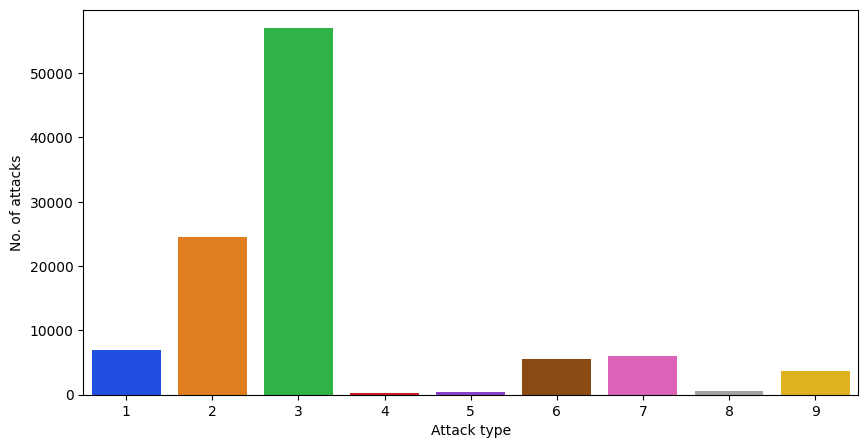

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='attacktype1', data=data, palette="bright")
plt.xlabel('Attack type')
plt.ylabel('No. of attacks')
plt.show()

## Region wise attacks

In [24]:
region_wise_attacks = data["region"].value_counts().head()
print(region_wise_attacks)

10    38122
6     34984
11    10183
5      9129
9      3991
Name: region, dtype: int64


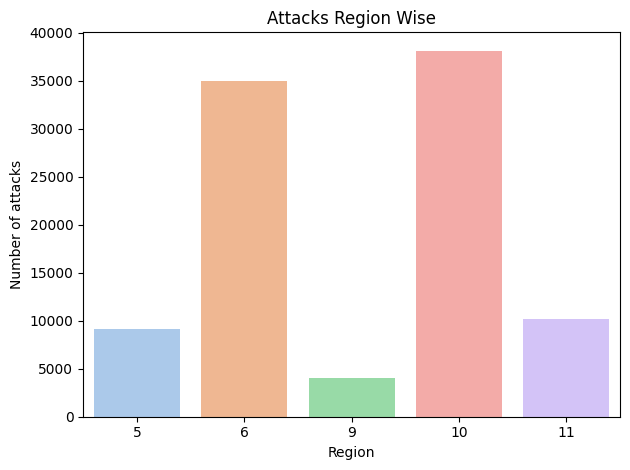

In [25]:
sns.barplot(x = region_wise_attacks.index, y = region_wise_attacks.values, palette="pastel")
plt.xlabel('Region')
plt.ylabel('Number of attacks')
plt.title('Attacks Region Wise')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Region Wise Attacks')

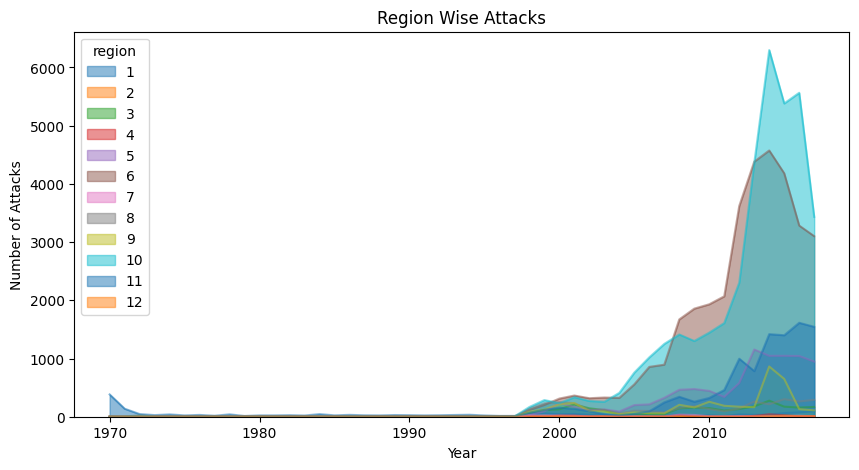

In [26]:
pd.crosstab(data.iyear, data.region).plot(kind = "area", stacked = False, figsize = (10,5))
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Region Wise Attacks')

## Country wise attacks

In [27]:
country_wise_attacks = data["country"].value_counts().head()
print(country_wise_attacks)

95     23145
153    12234
4      10971
92      8691
160     4780
Name: country, dtype: int64


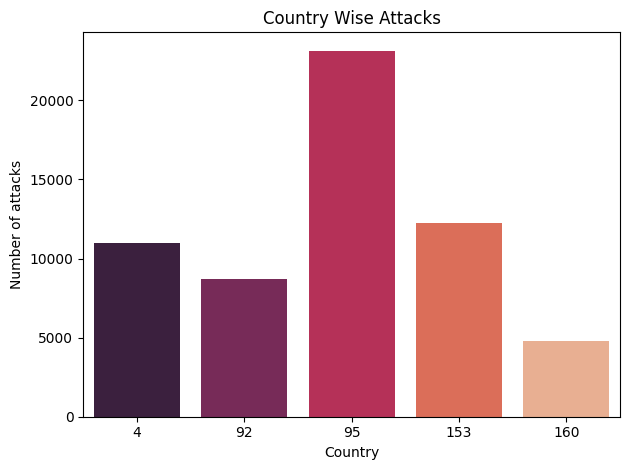

In [28]:
sns.barplot(x = country_wise_attacks.index, y = country_wise_attacks.values, palette="rocket")
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.title('Country Wise Attacks')
plt.tight_layout()
plt.show()

In [29]:
plt.figure(figsize=(20, 10), dpi=100)

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

## Top 15 areas that are attacked

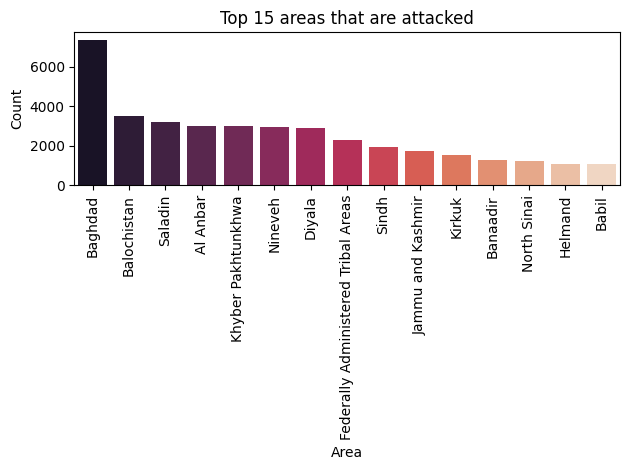

In [30]:
sns.barplot(
    x = data['provstate'].value_counts()[:15].index,
    y = data['provstate'].value_counts()[:15].values,
    palette="rocket")

plt.title("Top 15 areas that are attacked")
plt.xlabel("Area")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Attacks every year

In [31]:
attacks_every_year = data["iyear"].value_counts(dropna = False)
print(attacks_every_year)

2014    14793
2015    13246
2016    12168
2013    11342
2017     9719
2012     7999
2011     4888
2010     4717
2008     4487
2009     4452
2007     2917
2006     2414
2005     1820
2001     1780
2000     1621
1999     1267
2002     1203
2003     1139
2004     1016
1998      748
1970      383
1971      139
1972      118
1984       48
1974       42
1978       42
1986       40
1994       36
1990       33
1976       32
1991       31
1988       29
1989       29
1992       28
1973       28
1987       27
1995       27
1982       27
1985       26
1975       26
1981       24
1980       23
1997       23
1996       22
1983       21
1977       19
1979       14
Name: iyear, dtype: int64


Text(0.5, 1.0, 'Terrorist Attacks Every Year')

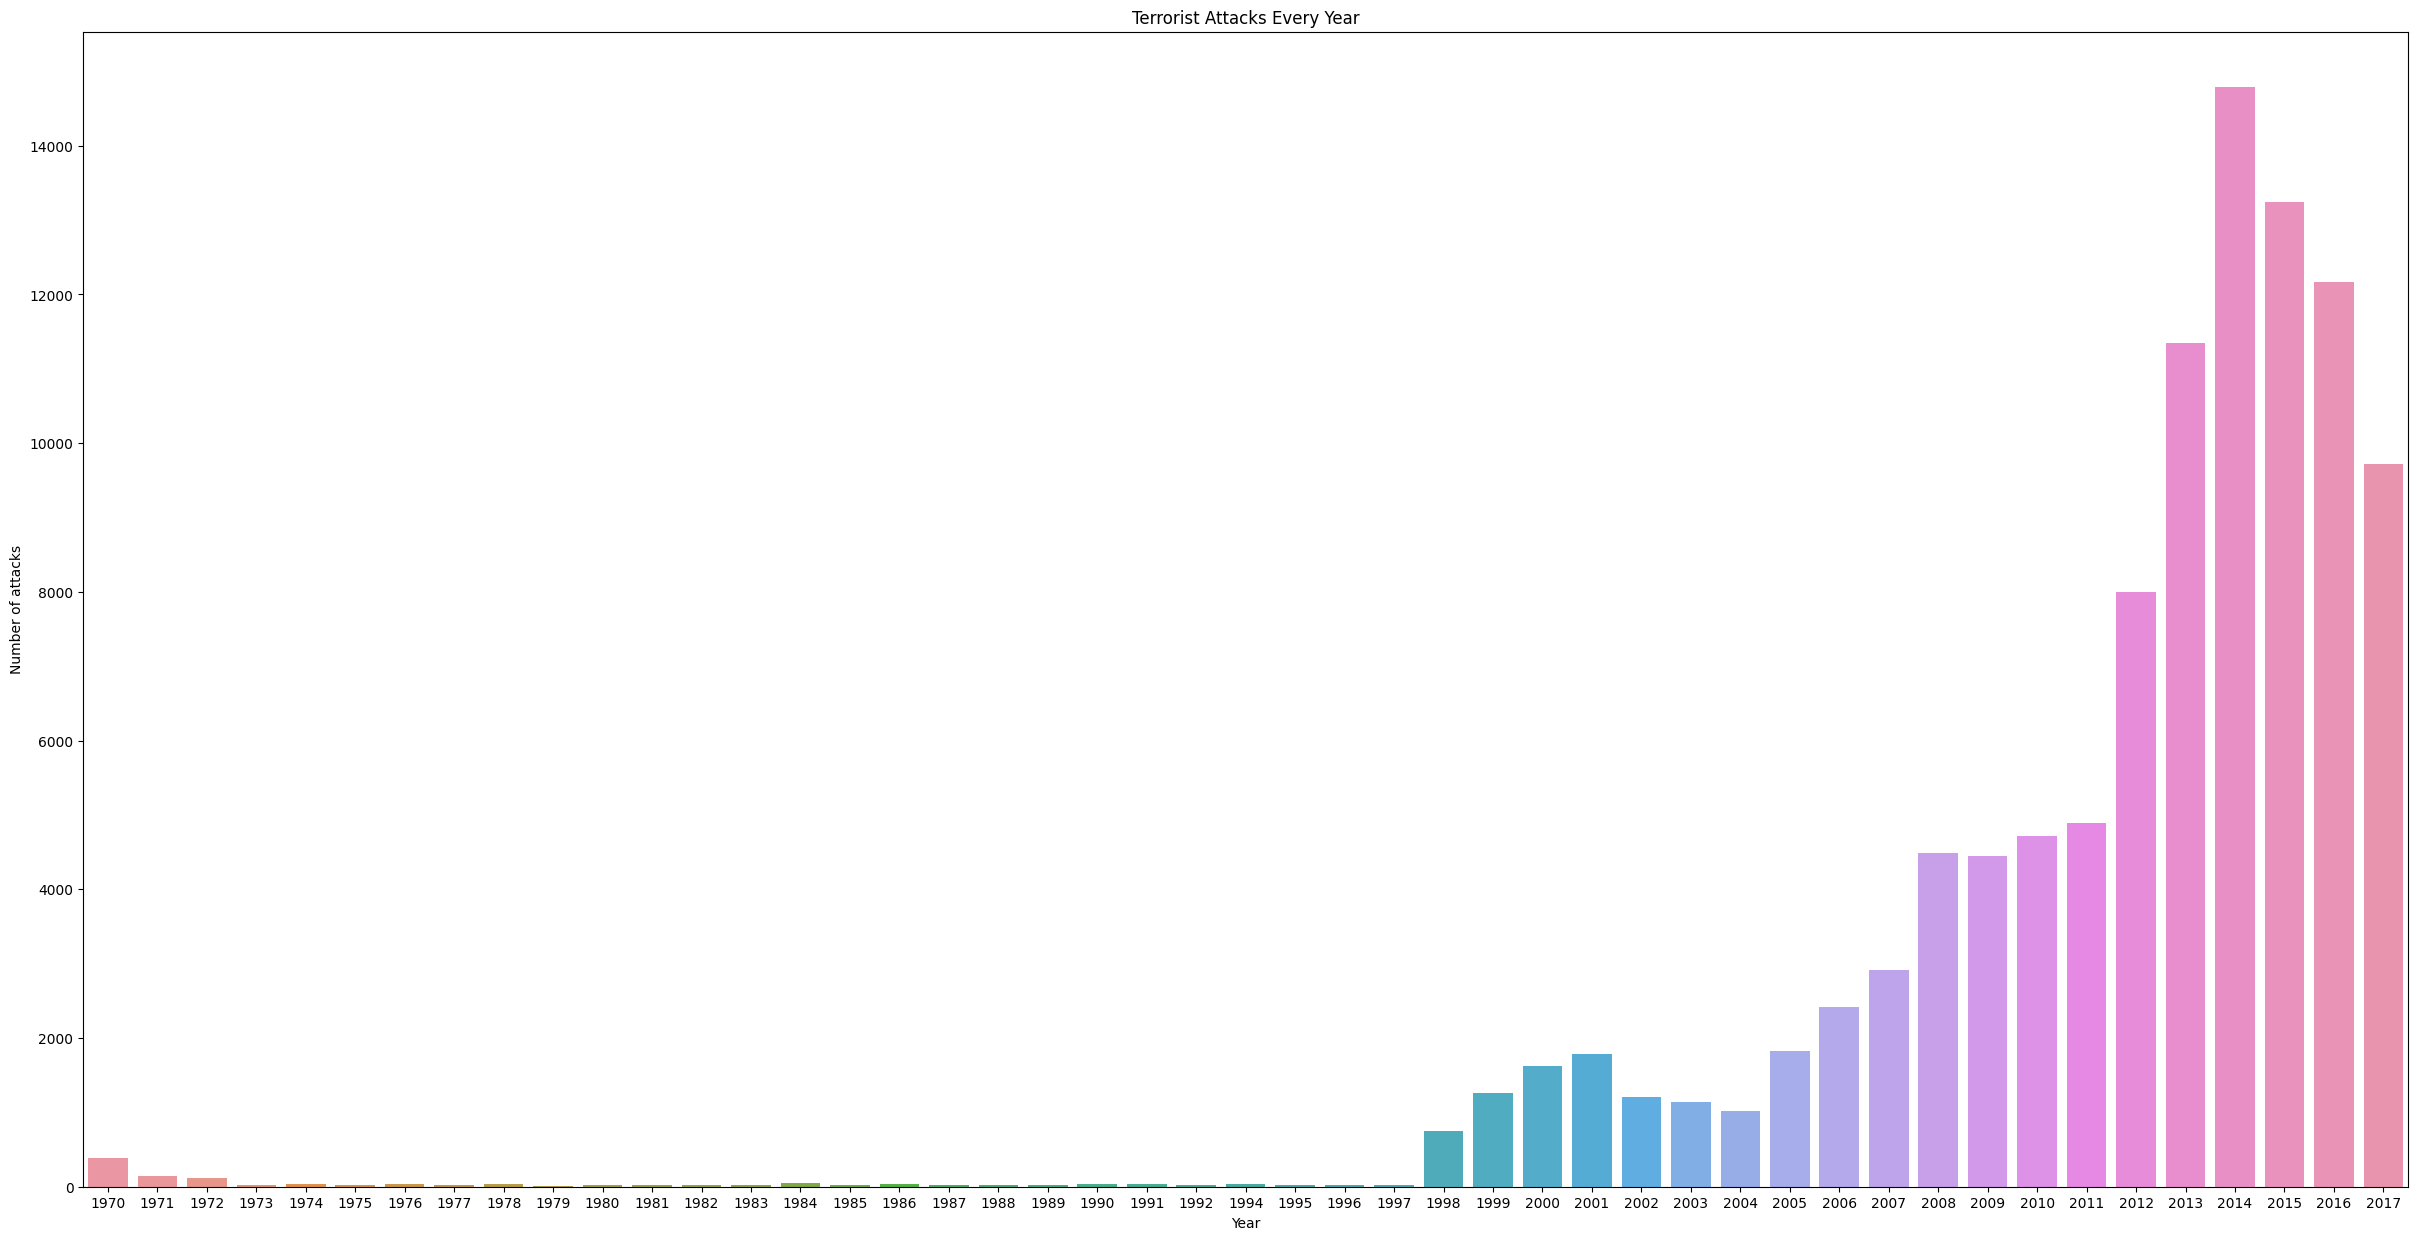

In [32]:
plt.figure(figsize=(30,15),dpi=100)
sns.countplot(x='iyear',data = data)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Terrorist Attacks Every Year')

## Weapon wise attacks

In [34]:
weapon_wise_attacks = data["weaptype1"].value_counts()
print(weapon_wise_attacks)

6     60670
5     29894
13     6390
8      5511
9      2034
2       224
11      114
10      106
12       82
1        24
7        13
3        11
Name: weaptype1, dtype: int64


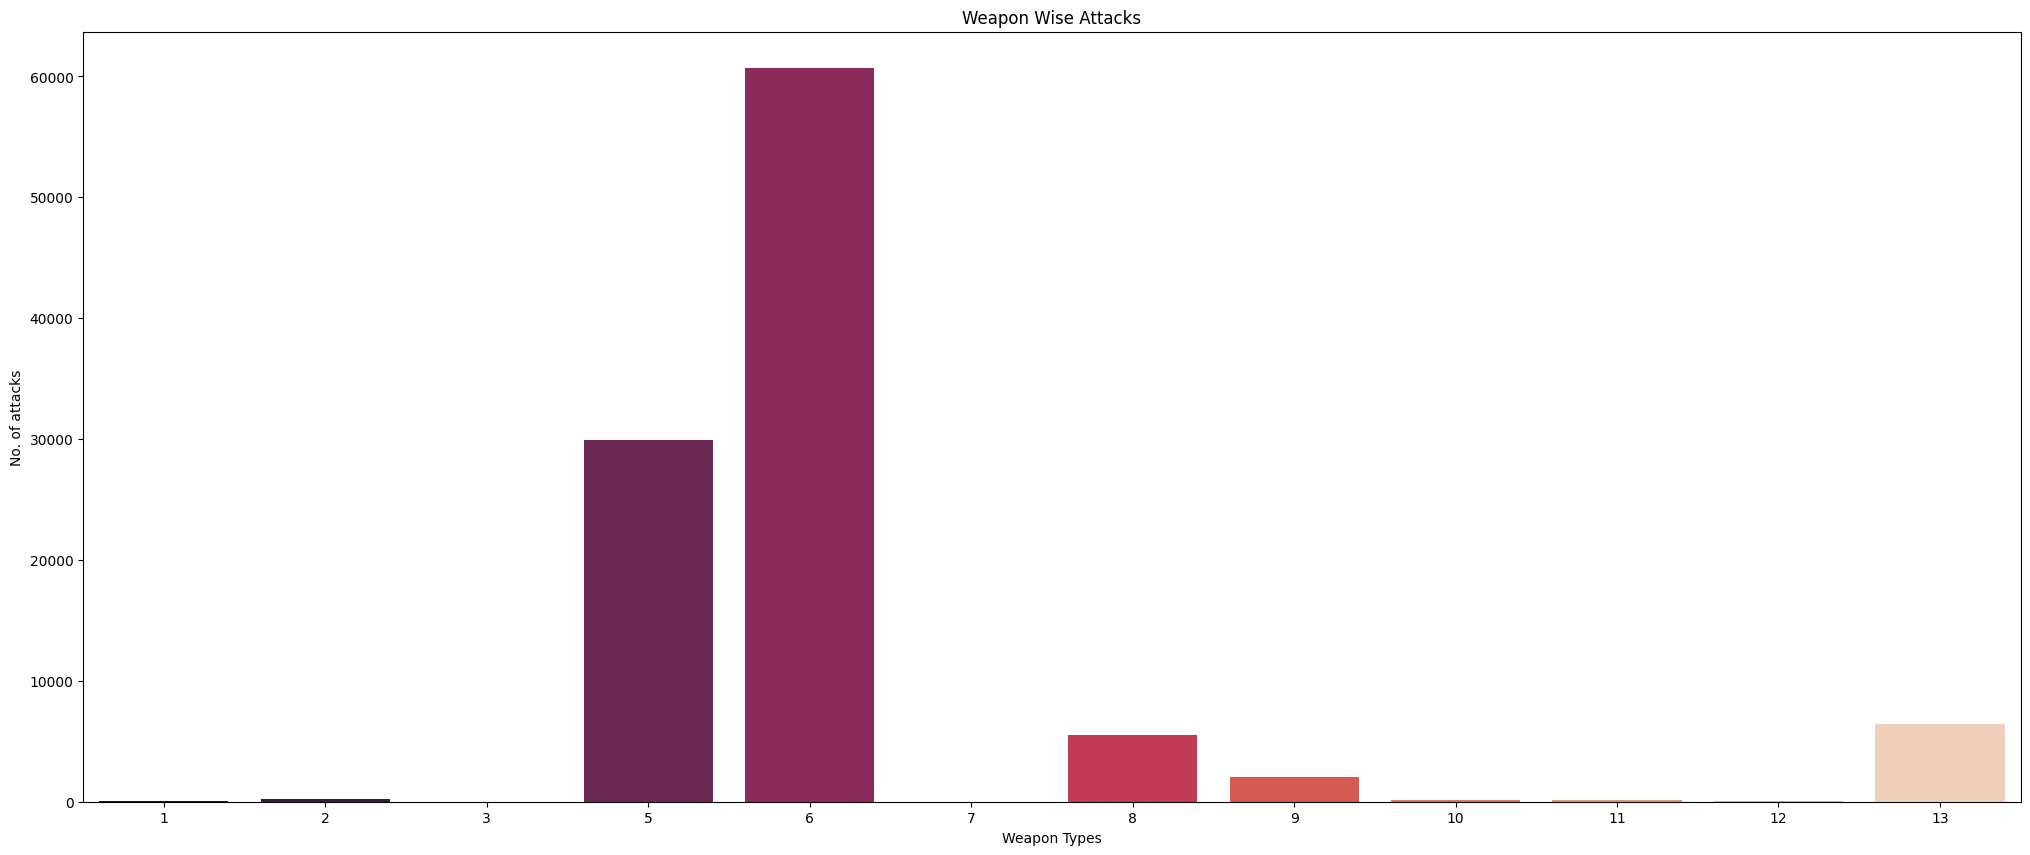

In [35]:
plt.figure(figsize=(25, 10))
sns.countplot(x='weaptype1', data = data, palette = "rocket")
plt.xlabel('Weapon Types')
plt.ylabel('No. of attacks')
plt.title('Weapon Wise Attacks')
#plt.xticks(rotation=90)
plt.show()

## Target type attacks

In [36]:
target_type_attacks = data["targtype1"].value_counts()
print(target_type_attacks)

14    27911
4     16438
3     15945
2     11981
1      9067
20     4084
19     3150
15     3047
8      2951
21     2326
17     2088
10     1359
7      1338
22     1076
12      625
16      580
6       353
5       213
18      164
9       149
11      121
13      107
Name: targtype1, dtype: int64


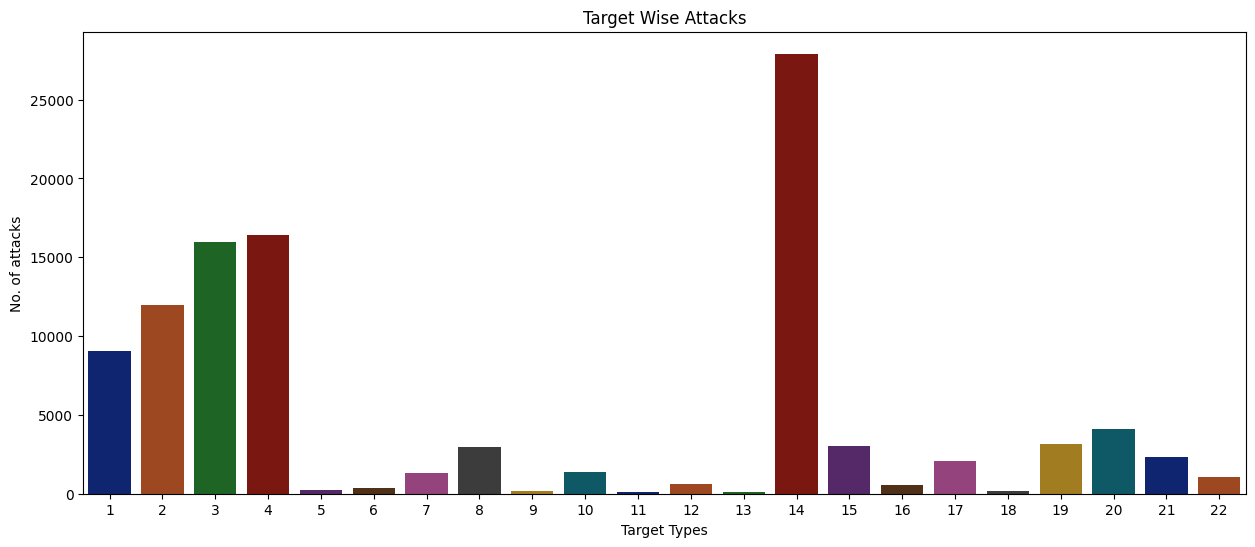

In [38]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'targtype1', data = data, palette = "dark")
plt.xlabel('Target Types')
plt.ylabel('No. of attacks')
plt.title('Target Wise Attacks')
plt.show()

## Conclusion

Below points can be concluded from the data analysis above:

- Baghdad is one of the areas with highest terrorist attacks
- 2014 witnessed the highest number of terrorist attacks
- 2015 and 2016 had second and third highest terrorist attacks respectively
- Safest zones include equator
- Boftari and Dorgali are one of the safest cities